# Class Imbalance Problem by Software Defect Prediction

### Abstract

Software defect prediction is a field which has encouraged researchers to develop sophisticated detection techniques using Machine Learning methods. The issues is that often the data available for the problem is highly imbalanced which makes it difficult for the classifiers to detect the defects. In order to overcome this issue several methods have been found out and all these methods can be classified mainly in three different categories namely,

#### 1. Resampling based methods:
These methods either use undersampling and oversampling techniques in order to transform the imbalanced dataset to a balanced one.

#### 2. Cost Sensitive Learning base models:
These kind of methods considers the cost associated with misclassifying examples and tries to make the classifier favor to the minority-class by adding different cost factors into the algorithms.

#### 3. Ensemble Learning:
These kind of methods tries to improve the performance of the imbalanced dataset 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import random

In [2]:
#cm1 = pd.read_csv("data/CM1.csv")
#print(sum(cm1.Defective == "Y"),cm1.shape[0],sum(cm1.Defective == "Y")/cm1.shape[0] * 100)
#jm1 = pd.read_csv("data/JM1.csv")
#print(sum(jm1.label == "Y"),jm1.shape[0],sum(jm1.label == "Y")/jm1.shape[0] * 100)
#kc1 = pd.read_csv("data/KC1.csv")
#print(sum(kc1.Defective == "Y"),kc1.shape[0],sum(kc1.Defective == "Y")/kc1.shape[0] * 100)
datasets = ['CM1','JM1','KC1','KC3','KC4','MC1','MC2','MW1','PC1','PC2','PC3','PC4','PC5']
d = {}
df = pd.DataFrame(columns = ["Project","Number of Defective instances","Total Number of instances","Percentage of Defective Instances"]
)
#df.columns = ["Project","Number of Defective instances","Total Number of instances","Percentage of Defective Instances"]

for i in range(len(datasets)):
    d[i] = pd.read_csv("data/"+datasets[i]+".csv")
    try:
        df.loc[len(df)] = [datasets[i],sum(d[i][d[i].columns[-1]] == "Y"),d[i].shape[0],sum(d[i][d[i].columns[-1]] == "Y")/d[i].shape[0] * 100]
        print(datasets[i],sum(d[i][d[i].columns[-1]] == "Y"),d[i].shape[0],sum(d[i][d[i].columns[-1]] == "Y")/d[i].shape[0] * 100)
    except:
        continue

CM1 42 344 12.209302325581394
JM1 1759 9591 18.340110520279428
KC1 325 2095 15.513126491646778
KC3 36 200 18.0
MC1 68 8737 0.7782991873640838
MC2 44 125 35.199999999999996
MW1 27 263 10.26615969581749
PC1 61 735 8.299319727891156
PC2 16 1493 1.0716677829872738
PC3 138 1099 12.556869881710647
PC4 178 1379 12.907904278462654
PC5 502 16962 2.9595566560547106


In [3]:
df

,Project,Number of Defective instances,Total Number of instances,Percentage of Defective Instances
0,CM1,42,344,12.209302
1,JM1,1759,9591,18.340111
2,KC1,325,2095,15.513126
3,KC3,36,200,18.000000
4,MC1,68,8737,0.778299
5,MC2,44,125,35.200000
6,MW1,27,263,10.266160
7,PC1,61,735,8.299320
8,PC2,16,1493,1.071668
9,PC3,138,1099,12.556870


Generally a dataset whose imbalanced ratio is more than **10:1** can be regarded as **highly imbalanced dataset**. Ordinary classifiers fail under these conditions and thus we require sophisticated techniques. In this analysis we'd try to develop a heuristic about which methods work best in which conditions. We'd work on the following datasets:

| Group | Project | Language | Number of Instances | Percentage of Defective Instances |
|-------|---------|----------|---------------------|-----------------------------------|
| NASA  |   PC5   |    C     |        16962        |              2.95%                |
| NASA  |   PC4   |    C     |        1379         |              12.9%                |
| NASA  |   JM1   |    C     |        9591         |              18.34%               |

We'd use the following techniques in order to deal with the selected datasets:

1. Ordinary Algorithms with Hyper-parameter tuning (if possible):
    - Support Vector Machine
    - Logistic Regression
2. Ensemble Based Methods:
    - Random Forests
    - Bagging
    - Boosting
3. Cluster-Based Over-Sampling with Filtering
    - Support Vector Machine
    - Logistic Regression
    - Random Forest
    - Bagging
    - Boosting

Note: we'd use **PCA** in order to reduce the over-fitting if required.

In [4]:
KC1 = d[2]

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Analysis for KC1
KC1.dtypes

LOC_BLANK                  int64
BRANCH_COUNT               int64
LOC_CODE_AND_COMMENT       int64
LOC_COMMENTS               int64
CYCLOMATIC_COMPLEXITY      int64
DESIGN_COMPLEXITY          int64
ESSENTIAL_COMPLEXITY       int64
LOC_EXECUTABLE             int64
HALSTEAD_CONTENT         float64
HALSTEAD_DIFFICULTY      float64
HALSTEAD_EFFORT          float64
HALSTEAD_ERROR_EST       float64
HALSTEAD_LENGTH            int64
HALSTEAD_LEVEL           float64
HALSTEAD_PROG_TIME       float64
HALSTEAD_VOLUME          float64
NUM_OPERANDS               int64
NUM_OPERATORS              int64
NUM_UNIQUE_OPERANDS        int64
NUM_UNIQUE_OPERATORS       int64
LOC_TOTAL                  int64
Defective                 object
dtype: object

In [6]:
## Correcting Defective label to int

KC1['Defective'] = (KC1['Defective'] == "Y")*1
KC1.dtypes

LOC_BLANK                  int64
BRANCH_COUNT               int64
LOC_CODE_AND_COMMENT       int64
LOC_COMMENTS               int64
CYCLOMATIC_COMPLEXITY      int64
DESIGN_COMPLEXITY          int64
ESSENTIAL_COMPLEXITY       int64
LOC_EXECUTABLE             int64
HALSTEAD_CONTENT         float64
HALSTEAD_DIFFICULTY      float64
HALSTEAD_EFFORT          float64
HALSTEAD_ERROR_EST       float64
HALSTEAD_LENGTH            int64
HALSTEAD_LEVEL           float64
HALSTEAD_PROG_TIME       float64
HALSTEAD_VOLUME          float64
NUM_OPERANDS               int64
NUM_OPERATORS              int64
NUM_UNIQUE_OPERANDS        int64
NUM_UNIQUE_OPERATORS       int64
LOC_TOTAL                  int64
Defective                  int64
dtype: object

In [7]:
##### Since, the number of defective instances is very less, we'd use 10-Fold cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,balanced_accuracy_score

kf = StratifiedKFold(n_splits=5)
X = KC1[KC1.columns[:-1]]
y = KC1[KC1.columns[-1]]

X = (X-X.mean())/X.std()
X.describe()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
count,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,...,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03,2.095000e+03
mean,-9.757244e-16,4.784823e-16,-5.004483e-16,3.049271e-16,-3.165328e-16,1.394536e-16,1.391621e-16,-1.921030e-17,-1.122596e-14,-2.610415e-16,...,-1.084786e-15,-5.834368e-16,2.957963e-15,-3.771579e-16,5.387364e-16,-4.420224e-16,-1.324584e-16,4.416515e-16,1.007067e-15,-3.317421e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.576562e-01,-4.705309e-01,-1.875811e-01,-3.072514e-01,-4.712458e-01,-4.578088e-01,-3.074993e-01,-6.030842e-01,-9.934782e-01,-8.658015e-01,...,-4.988884e-01,-5.986673e-01,-1.015650e+00,-3.016027e-01,-5.031108e-01,-5.882111e-01,-6.022354e-01,-7.858686e-01,-1.343518e+00,-6.493415e-01
25%,-4.576562e-01,-4.705309e-01,-1.875811e-01,-3.072514e-01,-4.712458e-01,-4.578088e-01,-3.074993e-01,-6.030842e-01,-7.456518e-01,-6.752388e-01,...,-4.988884e-01,-5.509244e-01,-7.616239e-01,-3.009135e-01,-4.876552e-01,-5.571034e-01,-5.444184e-01,-7.039910e-01,-8.187845e-01,-5.823150e-01
50%,-4.576562e-01,-4.705309e-01,-1.875811e-01,-3.072514e-01,-4.712458e-01,-4.578088e-01,-3.074993e-01,-3.968250e-01,-3.216036e-01,-4.211553e-01,...,-3.831569e-01,-3.957597e-01,-3.805846e-01,-2.889806e-01,-3.894926e-01,-4.015647e-01,-4.095120e-01,-3.764806e-01,-2.940511e-01,-3.812354e-01
75%,5.949037e-02,4.122107e-02,-1.875811e-01,-3.072514e-01,3.989060e-02,1.327758e-01,-3.074993e-01,9.819710e-02,3.963025e-01,3.182278e-01,...,2.190336e-02,9.360587e-02,1.111819e+00,-1.706808e-01,1.950208e-02,9.615932e-02,9.156893e-02,2.785402e-01,5.805046e-01,1.214636e-01
max,1.453959e+01,1.078801e+01,1.683693e+01,1.391084e+01,1.077376e+01,1.253505e+01,1.101829e+01,1.020490e+01,7.983139e+00,5.962694e+00,...,1.477767e+01,1.260227e+01,5.335005e+00,1.826081e+01,1.479569e+01,1.272591e+01,1.246441e+01,9.039443e+00,5.128194e+00,8.968966e+00


In [8]:
# Now we'd use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
XT = pca.fit_transform(X)
pca.explained_variance_ratio_*100

array([76.39923117,  5.42027294,  4.31088554,  3.72929403])

In [9]:
df = pd.DataFrame()
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = XT[:,i]
df.head()

,pc1,pc2,pc3,pc4
0,-1.974853,0.210051,-0.060375,-0.053187
1,-2.348586,-0.208836,0.021034,-0.555858
2,-2.348586,-0.208836,0.021034,-0.555858
3,-2.348586,-0.208836,0.021034,-0.555858
4,-1.468857,-0.188664,0.038772,0.048967


In [11]:
y = (y == 1)

In [12]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "rbf",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.16923076923076924
Batch Balanced Accuracy: 0.5803780964797914
Recall: 0.09230769230769231
Batch Balanced Accuracy: 0.5362668405041287
Recall: 0.13846153846153847
Batch Balanced Accuracy: 0.546631899174272
Recall: 0.06153846153846154
Batch Balanced Accuracy: 0.5251195132551065
Recall: 0.06153846153846154
Batch Balanced Accuracy: 0.5265319426336376
Average Balanced Accuracy: 0.5429856584093873
Std Balanced Accuracy: 0.020231440463355673
Average Recall Score: 0.10461538461538462
Std Recall Score: 0.042856579314412675


In [10]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "sigmoid",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.24615384615384617
Batch Balanced Accuracy: 0.5298565840938723
Recall: 0.2
Batch Balanced Accuracy: 0.5505649717514124
Recall: 0.2923076923076923
Batch Balanced Accuracy: 0.5529335071707954
Recall: 0.24615384615384617
Batch Balanced Accuracy: 0.6004780530204259
Recall: 0.2
Batch Balanced Accuracy: 0.5392655367231638
Average Balanced Accuracy: 0.554619730551934
Std Balanced Accuracy: 0.024377181332059517
Average Recall Score: 0.23692307692307693
Std Recall Score: 0.03453837587791331


In [11]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "linear",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.015384615384615385
Batch Balanced Accuracy: 0.5076923076923077
Recall: 0.0
Batch Balanced Accuracy: 0.5
Recall: 0.0
Batch Balanced Accuracy: 0.5
Average Balanced Accuracy: 0.5015384615384615
Std Balanced Accuracy: 0.0030769230769230656
Average Recall Score: 0.003076923076923077
Std Recall Score: 0.006153846153846154


In [12]:
#params_grid = {'C':[100,1000,10000],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}

bal = []
recall = []

kf = StratifiedKFold(n_splits=5)

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    svm = SVC(kernel = "poly",gamma = "auto")
    #grid = GridSearchCV(svm,params_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    svm.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    grid_predictions = svm.predict(Xtest)
    r = recall_score(ytest,grid_predictions)
    b = balanced_accuracy_score(ytest,grid_predictions)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.06153846153846154
Batch Balanced Accuracy: 0.5293568013906997
Recall: 0.03076923076923077
Batch Balanced Accuracy: 0.5097348978704911
Recall: 0.09230769230769231
Batch Balanced Accuracy: 0.5277922642329422
Recall: 0.1076923076923077
Batch Balanced Accuracy: 0.5481964363320295
Recall: 0.1076923076923077
Batch Balanced Accuracy: 0.5524337244676227
Average Balanced Accuracy: 0.533502824858757
Std Balanced Accuracy: 0.015420736329415437
Average Recall Score: 0.08
Std Recall Score: 0.02983187604563895


In [13]:
bal = []
recall = []

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    lr = LogisticRegression(solver = 'lbfgs')
    #grid = GridSearchCV(lr,param_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    lr.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    y_pred = lr.predict(Xtest)
    r = recall_score(ytest,y_pred)
    b = balanced_accuracy_score(ytest,y_pred)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

print("============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.23076923076923078
Batch Balanced Accuracy: 0.6012603215993046
Recall: 0.2
Batch Balanced Accuracy: 0.5844632768361582
Recall: 0.16923076923076924
Batch Balanced Accuracy: 0.5620165145588875
Recall: 0.12307692307692308
Batch Balanced Accuracy: 0.5544763146458062
Recall: 0.15384615384615385
Batch Balanced Accuracy: 0.5712733594089526
Average Balanced Accuracy: 0.5746979574098218
Std Balanced Accuracy: 0.01662758163508837
Average Recall Score: 0.17538461538461542
Std Recall Score: 0.03717860299567561


In [14]:
from sklearn.ensemble import RandomForestClassifier

bal = []
recall = []

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    rf = RandomForestClassifier(n_estimators = 100)
    #grid = GridSearchCV(lr,param_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    rf.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    y_pred = rf.predict(Xtest)
    r = recall_score(ytest,y_pred)
    b = balanced_accuracy_score(ytest,y_pred)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===========")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.2153846153846154
Batch Balanced Accuracy: 0.575206431986093
Recall: 0.23076923076923078
Batch Balanced Accuracy: 0.5941981747066493
Recall: 0.24615384615384617
Batch Balanced Accuracy: 0.5708170360712734
Recall: 0.15384615384615385
Batch Balanced Accuracy: 0.5656236418948284
Recall: 0.23076923076923078
Batch Balanced Accuracy: 0.588548457192525
Average Balanced Accuracy: 0.5788787483702739
Std Balanced Accuracy: 0.010792247703565079
Average Recall Score: 0.21538461538461537
Std Recall Score: 0.032271041482158515


In [15]:
from sklearn.naive_bayes import GaussianNB

bal = []
recall = []

for train,test in kf.split(df,y):
    Xtrain,Xtest = df.values[train],df.values[test]
    ytrain,ytest = y.values[train],y.values[test]
    nb = GaussianNB()
    #grid = GridSearchCV(lr,param_grid,refit = True,verbose = 0,scoring = 'balanced_accuracy',cv = 5)
    nb.fit(Xtrain,ytrain)
    #print(grid.best_estimator_)
    y_pred = nb.predict(Xtest)
    r = recall_score(ytest,y_pred)
    b = balanced_accuracy_score(ytest,y_pred)
    print("Recall:",r)
    print("Batch Balanced Accuracy:",b)
    bal += [b]
    recall += [r]

bal = np.array(bal)
recall = np.array(recall)
print("===========")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Recall: 0.2923076923076923
Batch Balanced Accuracy: 0.6348544111255976
Recall: 0.26153846153846155
Batch Balanced Accuracy: 0.596870925684485
Recall: 0.2923076923076923
Batch Balanced Accuracy: 0.606605823554976
Recall: 0.3076923076923077
Batch Balanced Accuracy: 0.6298348544111256
Recall: 0.2153846153846154
Batch Balanced Accuracy: 0.5667318557149066
Average Balanced Accuracy: 0.6069795740982181
Std Balanced Accuracy: 0.024582813812775543
Average Recall Score: 0.27384615384615385
Std Recall Score: 0.03285254846778865


In [17]:
import tensorflow as tf
from os_elm import OS_ELM
import tqdm

In [18]:
def softmax(a):
    c = np.max(a, axis=-1).reshape(-1, 1)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a, axis=-1).reshape(-1, 1)
    return exp_a / sum_exp_a

In [64]:
result = []
for j in range(10,12,1):
    mbal = []
    mrecall = []
    for k in range(10):
        tf.reset_default_graph()
        n_input_nodes = 4
        n_hidden_nodes = j
        n_output_nodes = 2
        bal = []
        recall = []

        for train,test in kf.split(df,y):
            Xtrain,Xtest = df.values[train],df.values[test]
            ytrain,ytest = y.values[train],y.values[test]
            ytrain = ytrain.reshape(-1,1)
            ytest = ytest.reshape(-1,1)
            ytrain = np.hstack((ytrain == False,ytrain))
            os_elm1 = OS_ELM(
                # the number of input nodes.
                n_input_nodes=n_input_nodes,
                # the number of hidden nodes.
                n_hidden_nodes=n_hidden_nodes,
                # the number of output nodes.
                n_output_nodes=n_output_nodes,
                # loss function.
                # the default value is 'mean_squared_error'.
                # for the other functions, we support
                # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
                loss='binary_crossentropy',
                # activation function applied to the hidden nodes.
                # the default value is 'sigmoid'.
                # for the other functions, we support 'linear' and 'tanh'.
                # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
                activation='sigmoid',
            )
            border = int(2*n_hidden_nodes)
            Xtrain_init = Xtrain[:border]
            Xtrain_seq = Xtrain[border:]
            ytrain_init = ytrain[:border]
            ytrain_seq = ytrain[border:]
            os_elm1.init_train(Xtrain_init, ytrain_init)
            batch_size = 64
            for i in range(0, len(Xtrain_seq), batch_size):
                x_batch = Xtrain_seq[i:i+batch_size]
                t_batch = ytrain_seq[i:i+batch_size]
                os_elm1.seq_train(x_batch, t_batch)
            n_classes = n_output_nodes
            y_pred = os_elm1.predict(Xtest)
            y_pred = softmax(y_pred)
            res = []
            for ys in y_pred:
                res.append(np.argmax(ys))
            res = np.array(res)
            #print(res)
            #print(ytest)
            r = recall_score(ytest,res)
            b = balanced_accuracy_score(ytest,res)
            #print("Recall:",r)
            #print("Batch Balanced Accuracy:",b)
            bal += [b]
            recall += [r]
            tf.reset_default_graph()

        bal = np.array(bal)
        recall = np.array(recall)
        mbal.append(np.mean(bal))
        mrecall.append(np.mean(recall))
    result.append((j,np.mean(mbal),np.std(mbal),np.mean(mrecall),np.std(mrecall)))
        #print("=============")
        #print("Average Balanced Accuracy:",np.mean(bal))
        #print("Std Balanced Accuracy:",np.std(bal))
        #print("Average Recall Score:",np.mean(recall))
        #print("Std Recall Score:",np.std(recall))
        #print(j)
        #print()

In [65]:
for i in result:
    print("J:",i[0])
    print("Average Balanced Accuracy:",i[1])
    print("Std Balanced Accuracy:",i[2])
    print("Average Recall:",i[3])
    print("Std Recall:",i[4])

J: 10
Average Balanced Accuracy: 0.518884398087788
Std Balanced Accuracy: 0.041376650867258946
Average Recall: 0.4113846153846154
Std Recall: 0.08942207609034636
J: 11
Average Balanced Accuracy: 0.5149200347674924
Std Balanced Accuracy: 0.031182111304427725
Average Recall: 0.39046153846153847
Std Recall: 0.14742572094199263


Random Forest also produces results similar to Logistic Regression and SVMs.

The average recall score as well as balanced accuracy score are higher for **Random Forest** as compared to the **SVM** and **Logistic Regression**.

Now we'd use the **KMFOS** technique which would generate extra samples and balance the dataset.

In [12]:
# Code for KMFOS

from sklearn.neighbors import NearestNeighbors

# Noise filtering step

def clni(n):
    nbrs = NearestNeighbors(n_neighbors = n, algorithm = 'auto', p = 2).fit(compData)
    distances,indices = nbrs.kneighbors(compData)
    dropped = []
    i = 0
    while i <len(compData):
        t,f = 0,0
        for j in range(n-1):
            if compData['defects'][indices[i][j+1]] == True:
                t += 1
            else:
                f += 1
        if t>f and compData['defects'][i] == False:
            dropped.append(i)
        elif f>t and compData['defects'][i] == True:
            dropped.append(i)
        i+=1
    return dropped

# Over-sampling step

def overSamplingM(clusters,d,nplus,n):
    k = len(clusters)
    t = 0
    s = 0
    first = False
    second = False
    for i in range(k):
        first = False
        second = False
        ni = len(clusters[i])
        for j in range(i+1,k):
            nj = len(clusters[j])
            if ni + nj == 0:
                continue
            alpha = ni/(ni+nj)
            beta = nj/(ni+nj)
            total = ((ni+nj)/((k-1)*nplus))*n
            t += total
            r = int(total)
            if(total-r > 0.5):
                r = r+1
            s += r
            for l in range(r):
                if ni:
                    p = clusters[i].sample()
                    #print("P:",p)
                    first = True
                if nj:
                    q = clusters[j].sample()
                    #print("Q:",q)
                    second = True
                if first and second:
                    m = alpha*p[p.columns[:-1]] + beta*q[q.columns[:-1]].values
                    m['defects'] = True
                    #print("M:",m)
                    d = d.append(m,ignore_index = True)
                elif first:
                    m = alpha*p[:-1]
                    m['defects'] = True
                    #print(m)
                    d = d.append(m,ignore_index = True)
                elif second:
                    m = beta*q[:-1]
                    m['defects'] = True
                    #print(m)
                    d = d.append(m,ignore_index = True)  
    #print(s)
    #print(t)
    return d

# Code for peforming initial clustering

def InitialClustering(dat,k):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',max_iter=300,n_init = 10,random_state = 0)
    kmeans.fit(dat)
    clusters = {}
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i] in clusters:
            clusters[kmeans.labels_[i]].append(dat.index[i])
        else:
            clusters[kmeans.labels_[i]] = [dat.index[i]]
    for key in clusters.keys():
        clusters[key] = np.array(clusters[key])
    return clusters

In [13]:
df
data = df
data['defects'] = (y == 1)

In [14]:
sum(data['defects'] == True)

325

In [15]:
df.dtypes

pc1        float64
pc2        float64
pc3        float64
pc4        float64
defects       bool
dtype: object

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

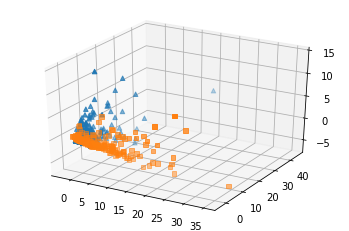

In [41]:
non = df[df['defects'] == False]
defective = df[df['defects'] == True]
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = non['pc3']
xline = non['pc2']
yline = non['pc1']
ax.scatter3D(xline, yline, zline, 'blue',marker = "^")

zline2 = defective['pc3']
yline2 = defective['pc2']
xline2 = defective['pc1']
ax.scatter3D(xline2,yline2,zline2,'red',marker = 's')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold

kf10 = StratifiedKFold(n_splits=5)

folds = []
for train,test in kf10.split(df[df.columns[:-1]],df[df.columns[-1]]):
    Xtrain = df.loc[train]
    Xtest,ytest = df.values[:,:-1][test],df.values[:,-1][test]
    test = (Xtest,ytest)
    params = {3:[5,15,20],5:[5,15,20],20:[5,15,20],50:[5,15,20]}
    result = {}
    key = 3
    val = 5
    for key in params.keys():
        for val in params[key]:
            X = Xtrain.copy()
            temp = Xtrain.defects
            X.index = [i for i in range(len(X))]
            Np = sum(X['defects'] == True)
            Nm = sum(X['defects'] == False)
            N = Nm - Np
            D = X.loc[X['defects'] == True]
            clusters = InitialClustering(D,key)
            for i in clusters.keys():
                clusters[i] = X.loc[clusters[i]]
            compData = overSamplingM(clusters,X,Np,N)
            compData = compData.dropna()
            #print("DefectiveInstances:",len(compData.groupby("defects").groups[True]))
            #print("NonDefectiveInstances:",len(compData.groupby("defects").groups[False]))
            dropped = clni(val)
            result[(key,val)] = compData.drop(index = dropped)
            #print("Defect:",len(result[(key,val)].groupby('defects').groups[True]))
            #print("NonDefect:",len(result[(key,val)].groupby('defects').groups[False]))
    print("Complete")    
    folds.append((result,test))

Complete
Complete
Complete
Complete
Complete


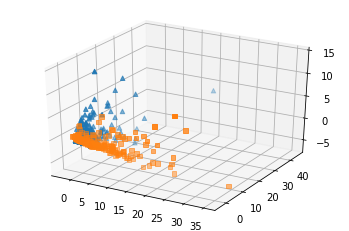

In [43]:
non = df[df['defects'] == False]
defective = df[df['defects'] == True]
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = non['pc3']
xline = non['pc2']
yline = non['pc1']
ax.scatter3D(xline, yline, zline, 'blue',marker = "^")

zline2 = defective['pc3']
yline2 = defective['pc2']
xline2 = defective['pc1']
ax.scatter3D(xline2,yline2,zline2,'red',marker = 's')

In [44]:
for fold in folds:
    print("Defect:",np.sum(fold[1][1]))
    print("NonDefect:",np.sum(fold[1][1] == 0))

Defect: 33
NonDefect: 177
Defect: 33
NonDefect: 177
Defect: 33
NonDefect: 177
Defect: 33
NonDefect: 177
Defect: 33
NonDefect: 177
Defect: 32
NonDefect: 177
Defect: 32
NonDefect: 177
Defect: 32
NonDefect: 177
Defect: 32
NonDefect: 177
Defect: 32
NonDefect: 177


In [45]:
l = np.array([bool(i) for i in folds[0][1][1]])
l.dtype

dtype('bool')

In [57]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y)
        y_pred = lr.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]        

        
mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6977343184122846
Std Balanced Accuracy: 0.021486822208099627
Average Recall Score: 0.6130769230769231
Std Recall Score: 0.12976081774744336


In [58]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'linear')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6941003911342895
Std Balanced Accuracy: 0.02170423421682797
Average Recall Score: 0.6076923076923078
Std Recall Score: 0.13202514055410075


In [59]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'poly')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6568575257134579
Std Balanced Accuracy: 0.028621132272352717
Average Recall Score: 0.5794871794871795
Std Recall Score: 0.1757205509653273


In [60]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'sigmoid')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6534637114298132
Std Balanced Accuracy: 0.022573043186450564
Average Recall Score: 0.5874358974358974
Std Recall Score: 0.08058954371513109


In [61]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        svm = SVC(gamma = 'auto',kernel = 'rbf')
        svm.fit(X,Y)
        y_pred = svm.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6892188179052585
Std Balanced Accuracy: 0.04003873457547765
Average Recall Score: 0.5856410256410257
Std Recall Score: 0.14786314905386752


In [62]:
from sklearn.ensemble import RandomForestClassifier
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y)
        y_pred = rf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6624688541213966
Std Balanced Accuracy: 0.044944627805461
Average Recall Score: 0.5348717948717949
Std Recall Score: 0.12429789671144965


In [63]:
from sklearn.naive_bayes import GaussianNB
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        nb = GaussianNB()
        nb.fit(X,Y)
        y_pred = nb.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6836418948283356
Std Balanced Accuracy: 0.03552385401758475
Average Recall Score: 0.5494871794871795
Std Recall Score: 0.12024410849549508


### OS-ELM

In [64]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes= 2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        #print(sum(Y),Y.shape)
        Y = np.hstack((Y==False,Y))
        #print(Y)
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Y[:border]
        ytrain_seq = Y[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_pred = os_elm1.predict(fold[1][0])
        #print(y_pred)
        y_pred = softmax(y_pred)
        res = []
        for ys in y_pred:
            res.append(np.argmax(ys))
        res = np.array(res)
        #print(y_pred,res)
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,res)
        r = recall_score(l,res)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.694154715341156
Std Balanced Accuracy: 0.024568539991735975
Average Recall Score: 0.6205128205128206
Std Recall Score: 0.12315435598371922


### Max-Vote LR + SVM + OS-ELM

In [53]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "linear")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6950040660845745
Std Balanced Accuracy: 0.057158467004803704
Average Recall Score: 0.5981060606060606
Std Recall Score: 0.14477557843611905


In [65]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "poly")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6902995074605244
Std Balanced Accuracy: 0.028312022481420698
Average Recall Score: 0.5884615384615385
Std Recall Score: 0.13883851815072062


In [66]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "sigmoid")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6956225554106911
Std Balanced Accuracy: 0.025087076979377544
Average Recall Score: 0.606923076923077
Std Recall Score: 0.12127581704582124


In [67]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "rbf")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res) >= 2)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6919611038678836
Std Balanced Accuracy: 0.02992786690156993
Average Recall Score: 0.5928205128205128
Std Recall Score: 0.13483035338753965


### Bagging SVM

In [68]:
from sklearn.ensemble import BaggingClassifier

bal = []
recall = []
for fold in folds:
    result = fold[0]
    #bal = []
    #recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "linear",gamma = "auto"),n_estimators=5,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    #bal = np.array(bal)
    #recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    #mbal += [np.mean(bal)]
    #mrecall += [np.mean(recall)]

bal = np.array(bal)
recall = np.array(recall)
print("=============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Average Balanced Accuracy: 0.6952835723598436
Std Balanced Accuracy: 0.02399038244472478
Average Recall Score: 0.6135897435897435
Std Recall Score: 0.13237600105069983


In [69]:
from sklearn.ensemble import BaggingClassifier

bal = []
recall = []
for fold in folds:
    result = fold[0]
    #bal = []
    #recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "poly",gamma = "auto"),n_estimators=5,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    #bal = np.array(bal)
    #recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    #mbal += [np.mean(bal)]
    #mrecall += [np.mean(recall)]

bal = np.array(bal)
recall = np.array(recall)
print("=============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Average Balanced Accuracy: 0.6562483702737938
Std Balanced Accuracy: 0.03588477674443804
Average Recall Score: 0.5979487179487178
Std Recall Score: 0.18554183495395374


In [70]:
from sklearn.ensemble import BaggingClassifier

bal = []
recall = []
for fold in folds:
    result = fold[0]
    #bal = []
    #recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "rbf",gamma = "auto"),n_estimators=5,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    #bal = np.array(bal)
    #recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    #mbal += [np.mean(bal)]
    #mrecall += [np.mean(recall)]

bal = np.array(bal)
recall = np.array(recall)
print("=============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Average Balanced Accuracy: 0.6906946255251342
Std Balanced Accuracy: 0.04239312456693395
Average Recall Score: 0.5894871794871794
Std Recall Score: 0.15275230796002312


In [71]:
from sklearn.ensemble import BaggingClassifier

bal = []
recall = []
for fold in folds:
    result = fold[0]
    #bal = []
    #recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=SVC(kernel = "sigmoid",gamma = "auto"),n_estimators=5,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    #bal = np.array(bal)
    #recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    #mbal += [np.mean(bal)]
    #mrecall += [np.mean(recall)]

bal = np.array(bal)
recall = np.array(recall)
print("=============")
print("Average Balanced Accuracy:",np.mean(bal))
print("Std Balanced Accuracy:",np.std(bal))
print("Average Recall Score:",np.mean(recall))
print("Std Recall Score:",np.std(recall))

Average Balanced Accuracy: 0.635379545125308
Std Balanced Accuracy: 0.04579801485739518
Average Recall Score: 0.5384615384615384
Std Recall Score: 0.12624137051375559


### Bagging LR

In [72]:
from sklearn.ensemble import BaggingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        clf = BaggingClassifier(base_estimator=LogisticRegression(solver = "lbfgs"),n_estimators=10,random_state = 0)
        clf.fit(X,Y)
        y_pred = clf.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6976796320440388
Std Balanced Accuracy: 0.02111428059914262
Average Recall Score: 0.6146153846153847
Std Recall Score: 0.12716656261870782


### Logistic + OS-ELM Hybrid Model

In [74]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(ys[1])
        res = np.array(res)
        #print("Res:",res)
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict_proba(fold[1][0])
        #print("Y_predl:",y_predl)
        res2 = []
        for ys in y_predl:
            res2.append(ys[1])
        res2 = np.array(res2)
        #print("Res2:",res2)
        #y_predl = y_predl.reshape(-1,1)
        #res = res.reshape(-1,1)
        #y_pred = np.max(res,res2)
        #print(res)
        #print(res2)
        y_pred = (res+res2)/2
        y_pred = (y_pred > 0.5)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6973967840069534
Std Balanced Accuracy: 0.02072470251661704
Average Recall Score: 0.6123076923076923
Std Recall Score: 0.1282810031886745


### Logistic + SVM + OS-ELM Hybrid Model

In [36]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=8,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(ys[1])
        res = np.array(res)
        #print("Res:",res)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict_proba(fold[1][0])
        #print("Y_predl:",y_predl)
        res2 = []
        for ys in y_predl:
            res2.append(ys[1])
        res2 = np.array(res2)
        
        svm = SVC(kernel = "rbf",gamma = "auto",probability=True)
        svm.fit(X,Y.ravel())
        y_preds = svm.predict_proba(fold[1][0])
        res3 = []
        for ys in y_preds:
            res3.append(ys[1])
        res3 = np.array(res3)
        
        #print("Res2:",res2)
        #y_predl = y_predl.reshape(-1,1)
        #res = res.reshape(-1,1)
        #y_pred = np.max(res,res2)
        #print(res)
        #print(res2)
        y_pred = (res+res2+res3)/3
        y_pred = (y_pred > 0.5)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6972974581621297
Std Balanced Accuracy: 0.05603713649575316
Average Recall Score: 0.5946890782828284
Std Recall Score: 0.14796686634458336


### Max-Vote with 5 classifiers

In [75]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "linear")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6854201071997682
Std Balanced Accuracy: 0.036697416260023534
Average Recall Score: 0.5635897435897437
Std Recall Score: 0.14444935004060483


In [76]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "rbf")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.689531363175431
Std Balanced Accuracy: 0.038412000725836816
Average Recall Score: 0.5771794871794872
Std Recall Score: 0.1438308415452634


In [77]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "poly")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6889207590902505
Std Balanced Accuracy: 0.03783613078513476
Average Recall Score: 0.5697435897435897
Std Recall Score: 0.1481811709853263


In [78]:
mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects'].values
        tf.reset_default_graph()
        os_elm1 = OS_ELM(
        # the number of input nodes.
        n_input_nodes=n_input_nodes,
        # the number of hidden nodes.
        n_hidden_nodes=9,
        # the number of output nodes.
        n_output_nodes=2,
        # loss function.
        # the default value is 'mean_squared_error'.
        # for the other functions, we support
        # 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
        loss='binary_crossentropy',
        # activation function applied to the hidden nodes.
        # the default value is 'sigmoid'.
        # for the other functions, we support 'linear' and 'tanh'.
        # NOTE: OS-ELM can apply an activation function only to the hidden nodes.
        activation='sigmoid',
    )
        Y = Y.reshape(-1,1)
        Yo = np.hstack((Y==False,Y))
        border = int(2*n_hidden_nodes)
        Xtrain_init = X[:border]
        Xtrain_seq = X[border:]
        ytrain_init = Yo[:border]
        ytrain_seq = Yo[border:]
        os_elm1.init_train(Xtrain_init, ytrain_init)
        batch_size = 64
        for i in range(0, len(Xtrain_seq), batch_size):
            x_batch = Xtrain_seq[i:i+batch_size]
            t_batch = ytrain_seq[i:i+batch_size]
            os_elm1.seq_train(x_batch, t_batch)
        n_classes = n_output_nodes
        y_predo = os_elm1.predict(fold[1][0])
        y_predo = softmax(y_predo)
        res = []
        for ys in y_predo:
            res.append(np.argmax(ys))
        res = np.array(res)
        
        svm = SVC(gamma = "auto",kernel = "sigmoid")
        svm.fit(X,Y.ravel())
        y_preds = svm.predict(fold[1][0])
        y_preds = y_preds.reshape(-1,1)
        
        lr = LogisticRegression(solver = "lbfgs")
        lr.fit(X,Y.ravel())
        y_predl = lr.predict(fold[1][0])
        y_predl = y_predl.reshape(-1,1)
        
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X,Y.ravel())
        y_predr = rf.predict(fold[1][0])
        y_predr = y_predr.reshape(-1,1)
        
        nb = GaussianNB()
        nb.fit(X,Y.ravel())
        y_predn = nb.predict(fold[1][0])
        y_predn = y_predn.reshape(-1,1)
        
        res = res.reshape(-1,1)
        y_pred = ((y_predl + y_preds + res + y_predr + y_predn) >= 3)*1
        y_pred = y_pred.ravel()
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6877777777777778
Std Balanced Accuracy: 0.035585876335597344
Average Recall Score: 0.57
Std Recall Score: 0.13830142689477512


### AdaBoost (LR)

In [79]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=LogisticRegression(solver = "lbfgs"))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.7000202810372302
Std Balanced Accuracy: 0.020249173344239587
Average Recall Score: 0.6125641025641027
Std Recall Score: 0.12211536779056355


In [19]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "rbf",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.675452339562509
Std Balanced Accuracy: 0.028194057542760907
Average Recall Score: 0.5823076923076923
Std Recall Score: 0.13007710250838034


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "sigmoid",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "linear",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        abc = AdaBoostClassifier(base_estimator=SVC(gamma = "auto",kernel = "poly",probability=True))
        abc.fit(X,Y)
        y_pred = abc.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

### Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

mbal = []
mrecall = []
for fold in folds:
    result = fold[0]
    bal = []
    recall = []
    for key in result.keys():
        dat = result[key]
        X = dat.iloc[:,:-1]
        Y = dat['defects']
        gb = GradientBoostingClassifier()
        gb.fit(X,Y)
        y_pred = gb.predict(fold[1][0])
        l = np.array([bool(i) for i in fold[1][1]])
        b = balanced_accuracy_score(l,y_pred)
        r = recall_score(l,y_pred)
        bal += [b]
        recall += [r]
    bal = np.array(bal)
    recall = np.array(recall)
    #print("Recall:",np.mean(recall))
    #print("Balanced Accuracy:",np.mean(bal))
    #print("====================")
    mbal += [np.mean(bal)]
    mrecall += [np.mean(recall)]

mbal = np.array(mbal)
mrecall = np.array(mrecall)
print("=============")
print("Average Balanced Accuracy:",np.mean(mbal))
print("Std Balanced Accuracy:",np.std(mbal))
print("Average Recall Score:",np.mean(mrecall))
print("Std Recall Score:",np.std(mrecall))

Average Balanced Accuracy: 0.6722950166594235
Std Balanced Accuracy: 0.047586842017935935
Average Recall Score: 0.5638461538461538
Std Recall Score: 0.15009836792116357
